conda install scikit-learn

## Regresión lineal



In [14]:
# modelo para predecir las casas en un futuro
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# dataset de kaggle
casas = pd.read_csv('USA_Housing.csv')
casas

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [16]:
#para ver los tipos de columnas
casas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [18]:
#para ver info de las col numéricas
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [22]:
#nombre de las columnas
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [26]:
#podemos ver una columna
casas['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

C:\Users\SARAPC\AppData\Local\Temp\ipykernel_12764\2761978606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(casas['Price'])


<Axes: xlabel='Price', ylabel='Density'>

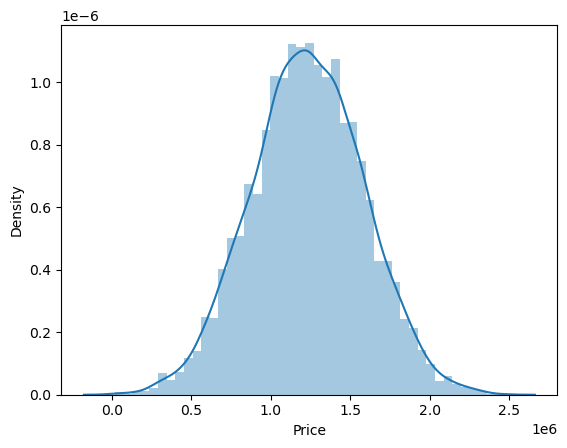

In [30]:
sns.distplot(casas['Price'])

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64


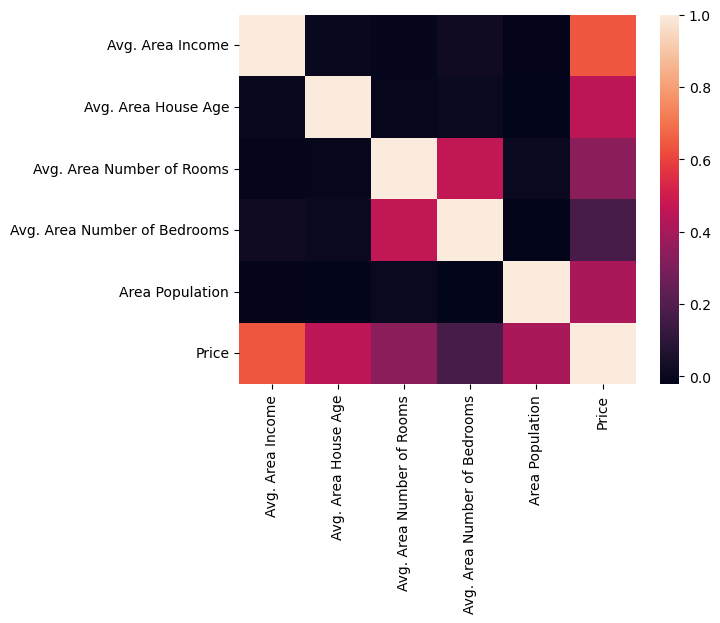

In [36]:
# Drop the irrelevant 'Address' column
casas = casas.drop(['Address'], axis=1)

# Check for missing values and handle them if necessary
print(casas.isnull().sum())  # Check for missing values

# If there are missing values, you can use imputation:
# casas.fillna(casas.mean(), inplace=True)

# Visualize the correlation matrix
sns.heatmap(casas.corr())
plt.show()

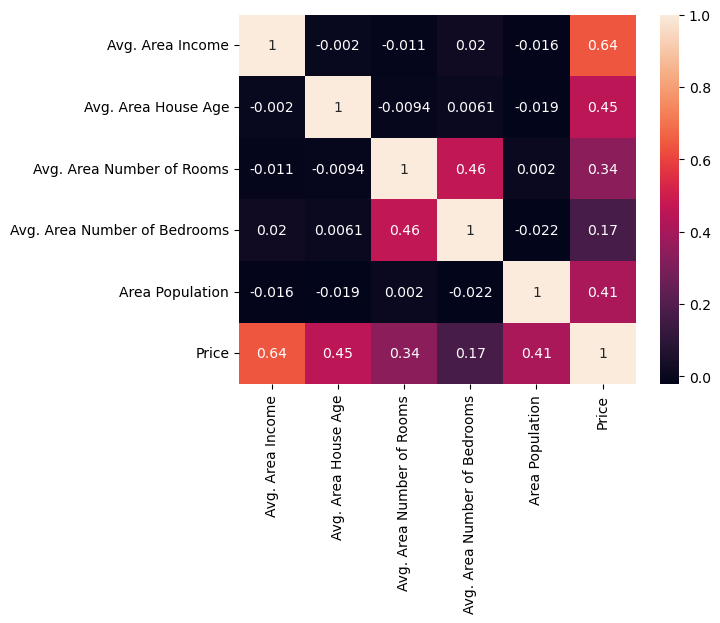

In [38]:
# para mostrar el porcentaje annot=True
sns.heatmap(casas.corr(), annot=True)
plt.show()

## Modelo de regresión lineal

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

casas.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06


In [43]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [49]:
#dividir el dataset en ejes x e y que será el precio
X = casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
Y = casas['Price']

In [51]:
# entrenamiento será el 70% y test será el 30% --> 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [59]:
# creamos el modelo
lrm = LinearRegression()
#entrenamos el modelo
lrm.fit(X_train, Y_train)

LinearRegression()

**Evaluamos el modelo**

In [62]:
from sklearn import metrics
predicciones = lrm.predict(X_test)
predicciones

array([1308536.13592605, 1237122.72746462, 1243835.62817079, ...,
       1457119.79297226, 1483428.95309313, 1047510.59737201])

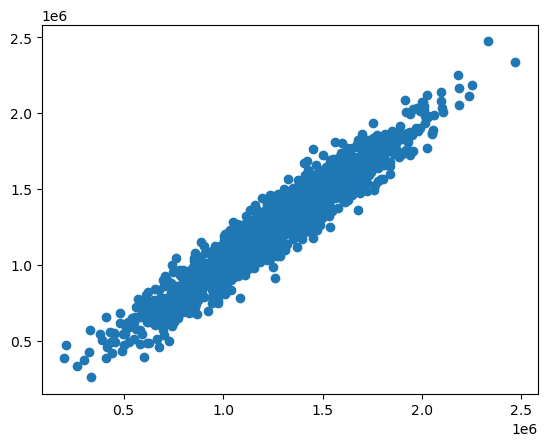

In [64]:
#ver el grafico de la diferencia entre las predicciones y los valores de prueba
#precio real y predicciones
plt.scatter(Y_test, predicciones)

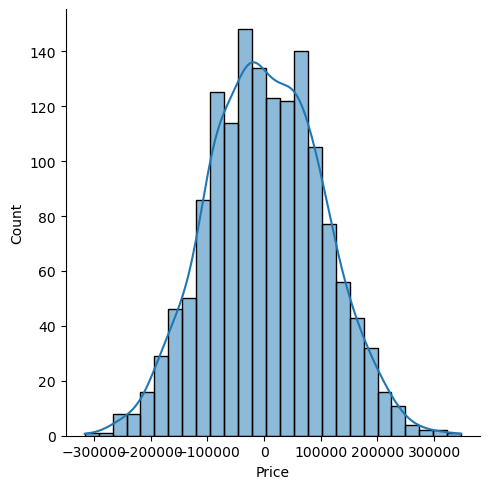

In [74]:
sns.displot(Y_test - predicciones, kde=True)

#evaluar el modelo para ver si es correcto
MAE mean absolute error - Media del valor absoluto de los errores

In [77]:
metrics.mean_absolute_error(Y_test, predicciones)

81135.5660933688

MSE media de los errores al  cuadrado

In [82]:
metrics.mean_squared_error(Y_test, predicciones)

10068422551.400925

RMSE media de los errores al cuadrado

In [85]:
np.sqrt(metrics.mean_squared_error(Y_test, predicciones))

100341.52954485458

## EJERCICIO

**Regresión Lineal con Datos de Ventas**

Supongamos que tienes un conjunto de datos que contiene información sobre las ventas de una tienda y la cantidad de dinero que se gastó en publicidad en diferentes medios (por ejemplo, televisión, radio y periódico).

Tu tarea es desarrollar una función llamada regresion_ventas que tome estos datos como entrada y ajuste un modelo de regresión lineal para predecir las futuras ventas en función de la inversión en publicidad.


def regresion_ventas(datos):

 
<font color='grey'>
    # Ejemplo de uso con datos reales<br>
    data = {
        'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
        'Radio': [37.8, 39.3, 45.9, 41.3, 10.8],
        'Periodico': [69.2, 45.1, 69.3, 58.5, 58.4],
        'Ventas': [22.1, 10.4, 9.3, 18.5, 12.9]
    }<br>
    df = pd.DataFrame(data)
    modelo_regresion = regresion_ventas(df)<br>
    # Estimaciones de ventas para nuevos datos de inversión en publicidad
    nuevos_datos = pd.DataFrame({'TV': [200, 60, 30], 'Radio': [40, 20, 10], 'Periodico': [50, 10, 5]})
    estimaciones_ventas = modelo_regresion.predict(nuevos_datos)<br>
    print("Estimaciones de Ventas:")<br>
    print(estimaciones_ventas)
</font><br>
Resultado:
<br>
<font color='grey'>
    Estimaciones de Ventas:<br>
    [21.54261464  8.48121675  4.16961329]
</font>

In [112]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [124]:
def regresion_ventas(datos):
    #dividir el dataset en ejes x e y que será el precio
    X = df[['TV', 'Radio', 'Periodico']]
    Y = df['Ventas']

    # entrenamiento será el 80% y test será el 20% --> 0.2
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # creamos el modelo
    lrm = LinearRegression()
    #entrenamos el modelo
    lrm.fit(X_train, Y_train)
    return lrm
    

In [126]:
data = { 'TV': [230.1, 44.5, 17.2, 151.5, 180.8], 'Radio': [37.8, 39.3, 45.9, 41.3, 10.8], 
        'Periodico': [69.2, 45.1, 69.3, 58.5, 58.4], 'Ventas': [22.1, 10.4, 9.3, 18.5, 12.9] } 
df = pd.DataFrame(data) 

nuevos_datos = pd.DataFrame({'TV': [200, 60, 30], 'Radio': [40, 20, 10], 'Periodico': [50, 10, 5]}) 

modelo_regresion = regresion_ventas(df) 
estimaciones_ventas = modelo_regresion.predict(nuevos_datos)
print("Estimaciones de Ventas:")
print(estimaciones_ventas)

Estimaciones de Ventas:
[22.3404651  11.29507012  7.16320257]


# Regresión logística

El resultado será SI o NO, 1 o 0

**La precisión sirve para saber la probabilidad de acierto en la predicción**<br>
Precisión = (positivos correctos + negativos correctos) / Total<br>
Resultado probabilidad de acierto del  n % <br>

**La tasa de error sirve para saber la probabilidad de error en la predicción**<br>
Tasa de error = (Falsos psoitivos + falsos negativos / Total<br>
Tasas de error = probabilidad de errror del n %<br>

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

entrenamiento = pd.read_csv('train.csv')
entrenamiento.head()
#0 no no ha sobrevivido 1 si

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

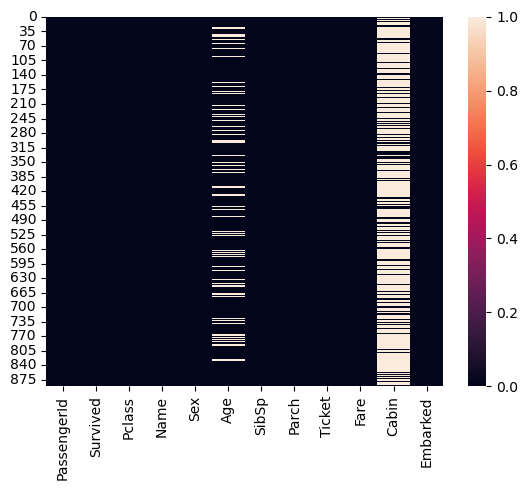

In [145]:
#numero de nulos en una columna para saber que columnas podemos despreciar
sns.heatmap(entrenamiento.isnull())

<Axes: xlabel='Survived', ylabel='count'>

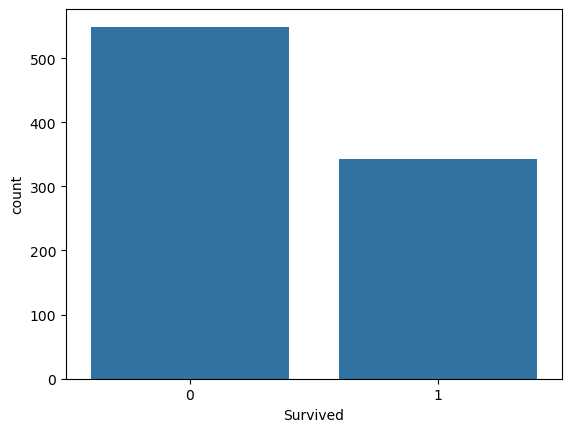

In [147]:
#podemos contar el num de supervivientes
sns.countplot(x='Survived', data=entrenamiento)

<Axes: xlabel='Survived', ylabel='count'>

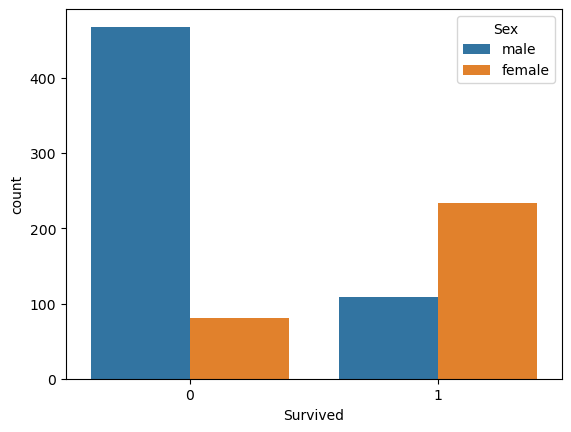

In [149]:
#dividir el num supervivientes x sexo o por la clase --> Pclass
sns.countplot(x='Survived', data=entrenamiento, hue='Sex')

C:\Users\SARAPC\AppData\Local\Temp\ipykernel_12764\2430676894.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(entrenamiento['Age'].dropna(), kde=False, bins=30)


<Axes: xlabel='Age'>

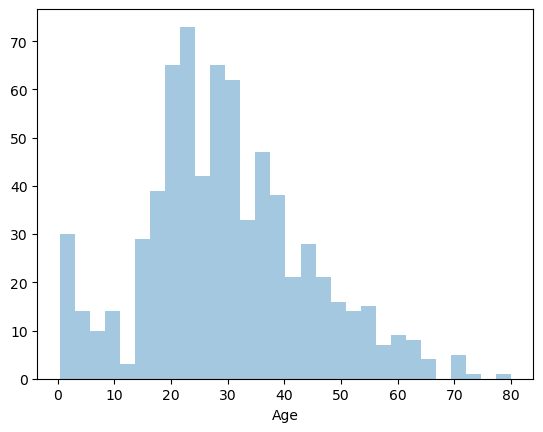

In [151]:
#franja de edades despreciando los valores nulos
sns.distplot(entrenamiento['Age'].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

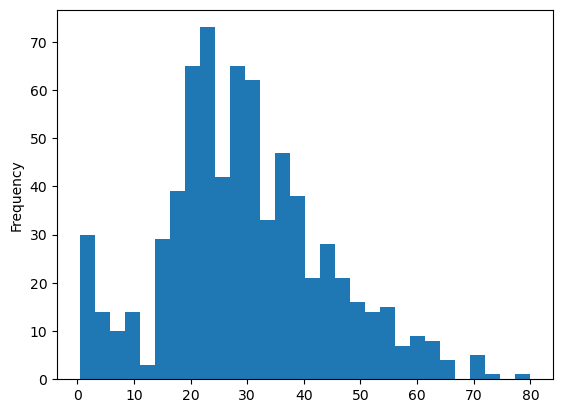

In [153]:
#igual q el anterior
entrenamiento['Age'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

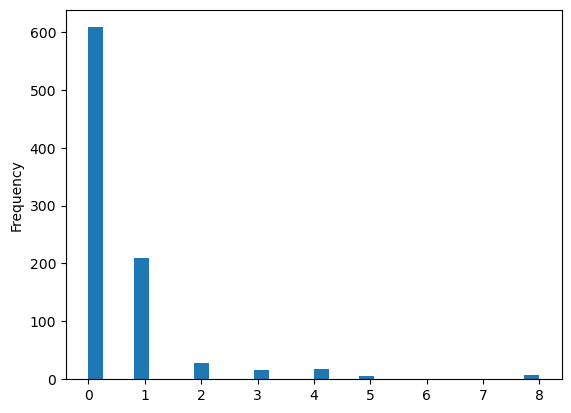

In [155]:
#numero de familiares de cada pasajero, la mayoría no tenía familiares
entrenamiento['SibSp'].plot.hist(bins=30)

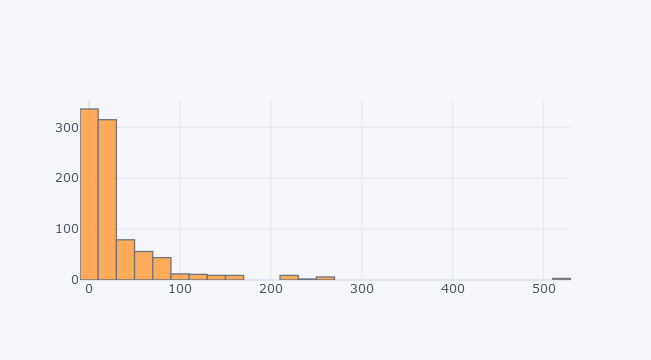

In [157]:
import cufflinks as cf
cf.go_offline()

entrenamiento['Fare'].iplot(kind='hist', bins=40)

**Limpieza de los datos**


C:\Users\SARAPC\AppData\Local\Temp\ipykernel_12764\943571916.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




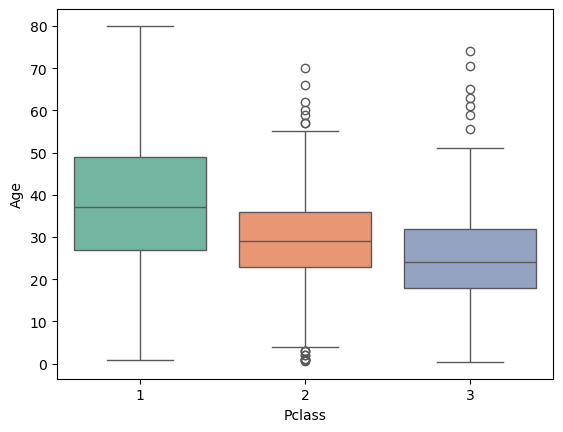

In [165]:
#calcular edad media
sns.boxplot(x='Pclass', y='Age', data=entrenamiento, palette='Set2')
plt.show()

In [167]:
#definimos funcion para calculas las medias
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad

entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis=1)

C:\Users\SARAPC\AppData\Local\Temp\ipykernel_12764\2160264250.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\SARAPC\AppData\Local\Temp\ipykernel_12764\2160264250.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

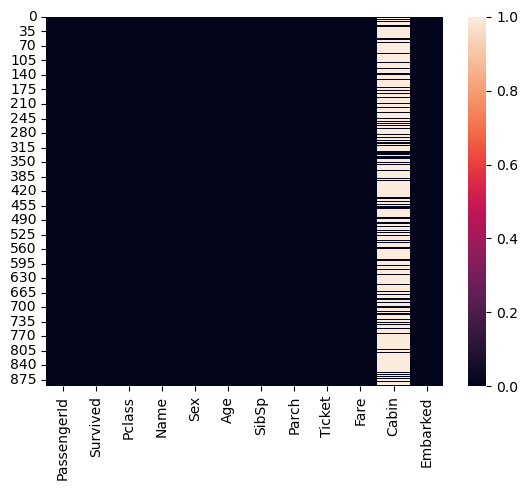

In [169]:
#comprobamos que en edad ya no hay blanccos
sns.heatmap(entrenamiento.isnull())

In [173]:
#borramos la columna cabin pq no es relevante
entrenamiento.drop('Cabin', axis=1, inplace=True)

<Axes: >

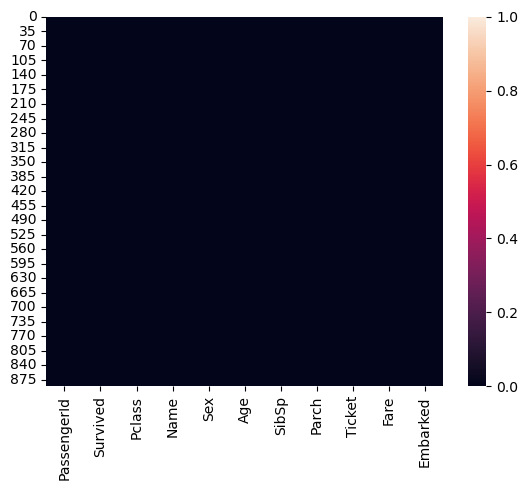

In [175]:
sns.heatmap(entrenamiento.isnull())

In [177]:
entrenamiento.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [179]:
#dejamos solo las col numéricas, nombre o ticket nos sobra
entrenamiento.drop(['Name', 'Ticket','PassengerId'], axis=1, inplace=True)

In [201]:
entrenamiento.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,male
0,0,3,male,22.0,1,0,7.2500,S,True,True
1,1,1,female,38.0,1,0,71.2833,C,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False
3,1,1,female,35.0,1,0,53.1000,S,False,False
4,0,3,male,35.0,0,0,8.0500,S,True,True
5,0,3,male,25.0,0,0,8.4583,Q,True,True
6,0,1,male,54.0,0,0,51.8625,S,True,True
7,0,3,male,2.0,3,1,21.0750,S,True,True
8,1,3,female,27.0,0,2,11.1333,S,False,False
9,1,2,female,14.0,1,0,30.0708,C,False,False


In [203]:
#los campos de sex lo vamos a poner en 0 1
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first=True)


In [211]:
#siguiente es borrar la col sex y poner en su lugar la de dummies
entrenamiento = pd.concat([entrenamiento, sexo], axis=1)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True


In [205]:
entrenamiento.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'male', 'male'],
      dtype='object')

In [207]:
entrenamiento.drop(['Sex'], axis=1, inplace=True)

In [213]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True


In [215]:
#hacemos lo mismo para embarque que con el sexo 
embarque = pd.get_dummies(entrenamiento['Embarked'], drop_first=True)
entrenamiento = pd.concat([entrenamiento, embarque], axis=1)
entrenamiento.drop(['Embarked'], axis=1, inplace=True)
entrenamiento.head()
#finalizado la limpieza del dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


**Entrenamiento del modelo**

vamos a predecir si sobrevive en función del resto de características

In [233]:
from sklearn.model_selection import train_test_split
Y = entrenamiento['Survived']
X = entrenamiento.drop('Survived', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45)
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
650,3,25.00,0,0,7.8958,True,False,True
784,3,25.00,0,0,7.0500,True,False,True
125,3,12.00,1,0,11.2417,True,False,False
54,1,65.00,0,1,61.9792,True,False,False
446,2,13.00,0,1,19.5000,False,False,True
226,2,19.00,0,0,10.5000,True,False,True
39,3,14.00,1,0,11.2417,False,False,False
298,1,38.00,0,0,30.5000,True,False,True
176,3,25.00,3,1,25.4667,True,False,True
258,1,35.00,0,0,512.3292,False,False,False


In [237]:
#entrenamos el modelo
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [239]:
#el modelo ya está entrenado, ahora vamos a ahcer las predicciones

predicciones = modelo.predict(X_test)
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [241]:
#para ver la precisión de nuestro modelo
from sklearn.metrics import classification_report
print(classification_report(Y_test, predicciones))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.78      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268



In [243]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predicciones)
#152 son los positivos correctos, 26 es falsos negativos, 20 falsos positivos , 70 negativos correctos

array([[152,  26],
       [ 20,  70]], dtype=int64)

In [62]:
from sklearn import metrics
predicciones = lrm.predict(X_test)
predicciones

array([1308536.13592605, 1237122.72746462, 1243835.62817079, ...,
       1457119.79297226, 1483428.95309313, 1047510.59737201])